# Exercise 1b

In [ ]:
import numpy as np

# 12/09/23 - Seaborn raises a warning that will be fixed in the next version
# if you want to ignore it, uncomment the following lines:

# import warnings
# warnings.filterwarnings('ignore')

## Exercise 1

In [15]:
in_dir = 'data/'
txt_name = 'irisdata.txt'
iris_data = np.loadtxt(in_dir + txt_name, comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:50, 0:4]

In [16]:
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

Number of features: 4 and number of observations: 50


## Exercise 2

In [17]:
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]

# Use ddof = 1 to make an unbiased estimate
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_w = pet_w.var(ddof=1)

## Exercise 3

In [18]:
cov_l = sep_l.dot(pet_l)/(n_obs - 1)
cov_w = sep_l.dot(sep_w)/(n_obs -1)

In [19]:
print(f"Sepal length, petal length covariance: {cov_l}. ")
print(f"Sepal length, sepal width covariance: {cov_w}. ")

Sepal length, petal length covariance: 7.484489795918367. 
Sepal length, sepal width covariance: 17.61. 


## Exercise 4

c:\Users\mcbo\AppData\Local\miniconda3\envs\course02502\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcbo\AppData\Local\miniconda3\envs\course02502\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcbo\AppData\Local\miniconda3\envs\course02502\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcbo\AppData\Local\miniconda3\envs\course02502\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Figure size 640x480 with 0 Axes>

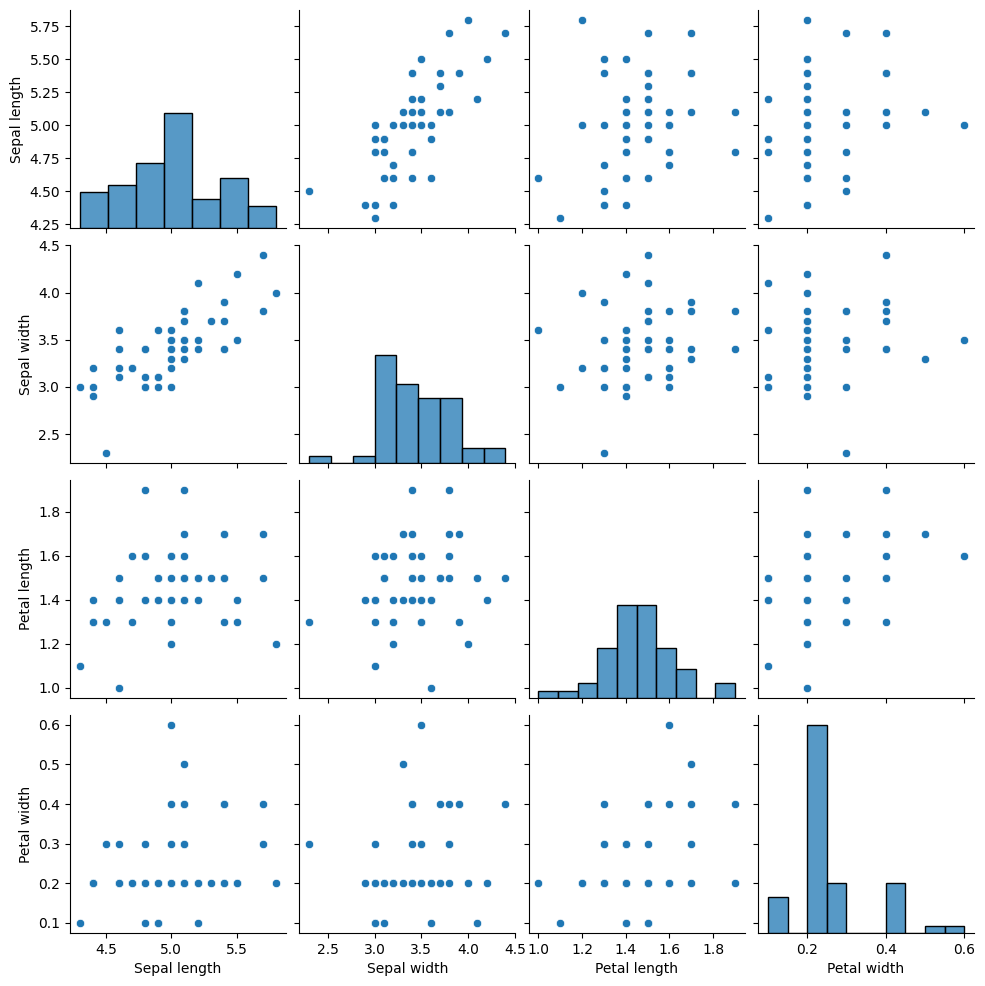

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])

p = sns.pairplot(d)

plt.show()

## Exercise 5

In [21]:
mn = np.mean(x, axis=0)
data = x - mn

In [22]:
c_x = (data.T @ data)/(n_obs - 1)
c_x_np = np.cov(data.T)

np.allclose(c_x, c_x_np)

True

## Exercise 6

In [23]:
values, vectors = np.linalg.eig(c_x)

## Exercise 7

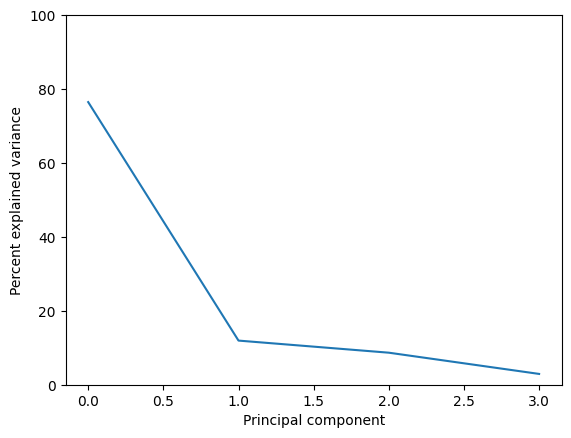

In [24]:
v_norm = values / values.sum() * 100
plt.plot(v_norm)
plt.xlabel('Principal component')
plt.ylabel('Percent explained variance')
plt.ylim([0, 100])
plt.show()

## Exercise 8

In [25]:
pc_proj = vectors.T.dot(data.T)

c:\Users\mcbo\AppData\Local\miniconda3\envs\course02502\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcbo\AppData\Local\miniconda3\envs\course02502\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcbo\AppData\Local\miniconda3\envs\course02502\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcbo\AppData\Local\miniconda3\envs\course02502\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Figure size 640x480 with 0 Axes>

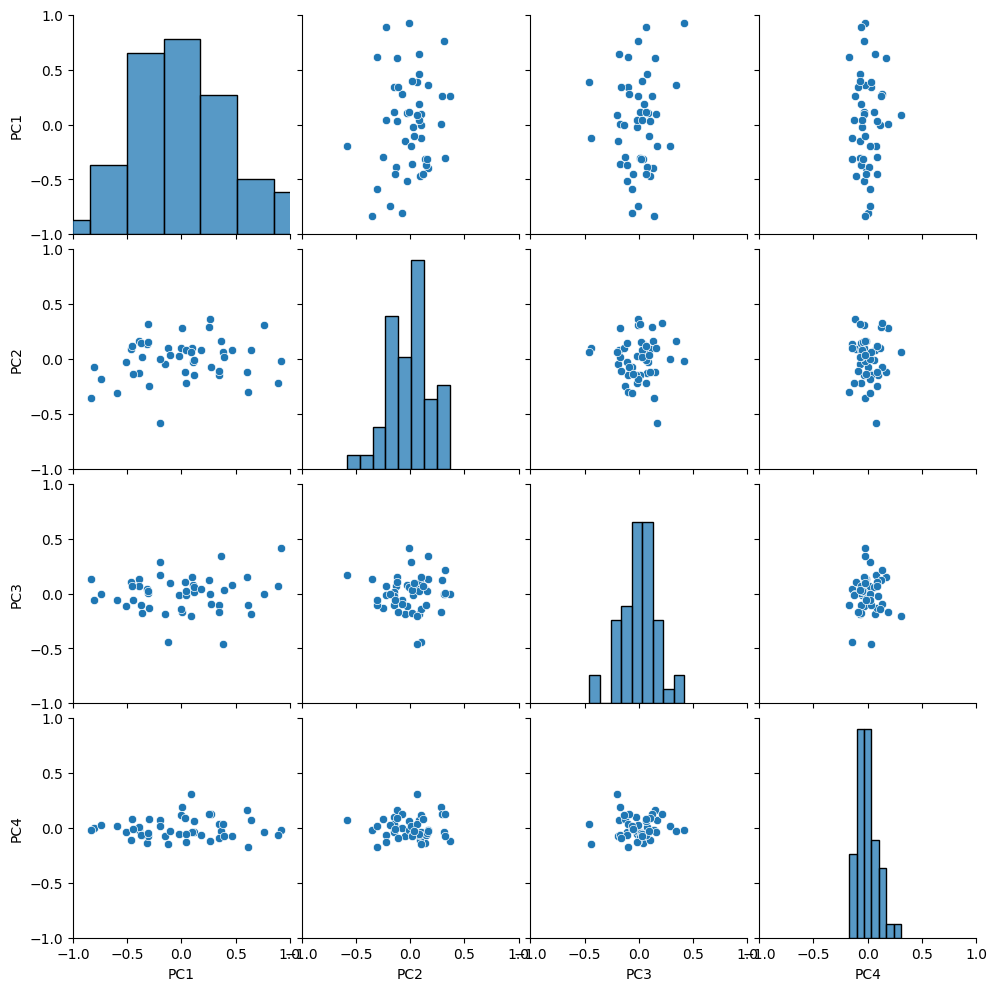

In [26]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(pc_proj.T, columns=['PC1', 'PC2', 'PC3', 'PC4'])

p = sns.pairplot(d)
p.set(xlim=(-1,1), ylim = (-1,1))
plt.show()

## Exercise 9

In [27]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(x)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_
data_transform = pca.transform(data)